# Lecture 11. Intro to iterative methods

## Previous lecture: reminder

- Sparse matrices: formats and efficiency
- LU decomposition for sparse matrices
- Fill-in and ordering
- Separators and graph Laplacian 

### The main topics for today

Concept of **iterative methods** for linear systems: 
- Richardson iteration and its convergence
- Chebyshev iteration

# Iterative methods

- If we want to achieve $\mathcal{O}(N)$ complexity of solving sparse linear systems, then direct solvers are not appropriate.

- If we want to solve partial eigenproblem, the full eigendecomposition is too costly.

- For both problems we will use iterative, Krylov subspace solvers, which treat the matrix as a **black-box** linear operator.

## Matrix as a black box

- We have now an absolutely different view on a matrix: matrix is now a **linear operator**, that acts on a vector,  
and this action can be computed in $\mathcal{O}(N)$ operations.

- **This is the only information** we know about the matrix: the <font color='red'> matrix-by-vector product (matvec) </font>

- Can we solve linear systems using only matvecs?

- Of course, we can multiply by the colums of the identity matrix, and recover the full matrix, but it is not what we need.

## Richardson iteration
The simplest idea is the **"simple iteration method"** or **Richardson iteration**.  


  $$Ax = f,$$
  $$\tau  (Ax - f) = 0,$$
   $$x - \tau (Ax - f) = x,$$
   $$x_{k+1} = x_k - \tau (Ax_k - f),$$
   
   where $\tau$ is the **iteration parameter**, which can be always chosen such that the method **converges**.

## Connection to ODEs

- The Richardson iteration has a deep connection to the Ordinary Differential Equations (ODE).


- Consider a time-dependent problem ($A=A^*>0$)

$$\frac{dy}{dt} + A y = f, \quad y(0) = y_0.$$

- Then $y(t) \rightarrow A^{-1} f$ as $t \rightarrow \infty$, and the **Euler scheme** reads

$$\frac{y_{k+1} - y_k}{\tau} = -A y_k + f.$$

which leads to the Richardson iteration

$$
    y_{k+1} = y_k - \tau(Ay_k -f)
$$

## Convergence of the Richardson method

- Let $x_*$ be the solution; introduce an error $e_k = x_{k} - x_*$, then  

$$
     e_{k+1} = (I - \tau A) e_k,
$$

therefore if $\Vert I - \tau A \Vert < 1$ in any norm, the iteration converges. 

- For symmetric positive definite case it is always possible to select $\tau$ such that the method converges.

- What about the non-symmetric case? Below demo will be presented...

## Optimal parameter choice

- The choise of $\tau$ that minimizes $\|I - \tau A\|_2$ for $A = A^* > 0$ is (prove it!)

$$
  \tau_\mathrm{opt} = \frac{2}{\lambda_{\min} + \lambda_{\max}}.
$$

where $\lambda_{\min}$ is the minimal eigenvalue, and $\lambda_{\max}$ is the maximal eigenvalue of the matrix $A$.

- So, to find optimal parameter, we need to know the **bounds of the spectrum** of the matrix $A$, and we can compute it by using **power method**.

## Condition number and convergence speed

Even with the optimal parameter choice, the error at the next step satisfies

$$\|e_{k+1}\|_2 \leq q \|e_k\|_2 , \quad\rightarrow \quad \|e_k\|_2 \leq q^{k} \|e_0\|_2,$$

where 

$$
   q = \frac{\lambda_{\max} - \lambda_{\min}}{\lambda_{\max} + \lambda_{\min}} = \frac{\mathrm{cond}(A) - 1}{\mathrm{cond}(A)+1},
$$

$$\mathrm{cond}(A) = \frac{\lambda_{\max}}{\lambda_{\min}} \quad \text{for} \quad A=A^*>0$$

is the condition number of $A$.

Let us do some demo...

Maximum eigenvalue = 3.6825070656623633, minimum eigenvalue = 0.08101405277100539
Condition number = 45.45516413147915
[0.9186479  0.94484203 0.95170654 0.95466793 0.95595562 0.95651542
 0.9567591  0.95686534 0.95691172 0.95693198 0.95694084 0.95694472
 0.95694642 0.95694716 0.95694748 0.95694763 0.95694769 0.95694771
 0.95694773 0.95694773 0.95694773 0.95694774 0.95694774 0.95694774
 0.95694774 0.95694774 0.95694774 0.95694774 0.95694774 0.95694774
 0.95694774 0.95694774 0.95694774 0.95694774 0.95694774 0.95694774
 0.95694774 0.95694774 0.95694774 0.95694774 0.95694774 0.95694774
 0.95694774 0.95694774 0.95694774 0.95694774 0.95694774 0.95694774
 0.95694774 0.95694774 0.95694774 0.95694774 0.95694774 0.95694774
 0.95694774 0.95694774 0.95694774 0.95694774 0.95694774 0.95694774
 0.95694774 0.95694774 0.95694774 0.95694774 0.95694774 0.95694774
 0.95694774 0.95694774 0.95694774 0.95694774 0.95694774 0.95694774
 0.95694774 0.95694774 0.95694774 0.95694774 0.95694774 0.95694774
 0.9569477

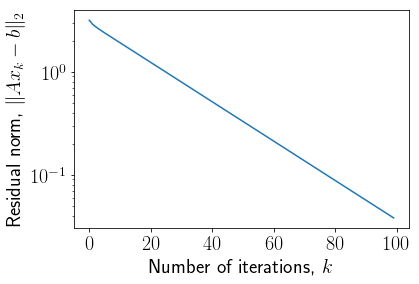

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("text", usetex=True)
import scipy as sp
import scipy.sparse
import scipy.sparse.linalg as spla
import scipy
from scipy.sparse import csc_matrix
n = 10
ex = np.ones(n);
A = sp.sparse.spdiags(np.vstack((-ex,  2*ex, -ex)), [-1, 0, 1], n, n, 'csr'); 
rhs = np.ones(n)
ev1, vec = spla.eigsh(A, k=2, which='LA')
ev2, vec = spla.eigsh(A, k=2, which='SA')
lam_max = ev1[0]
lam_min = ev2[0]

tau_opt = 2.0/(lam_max + lam_min)

fig, ax = plt.subplots()
plt.close(fig)

niters = 100
x = np.zeros(n)
res_richardson = []
for i in range(niters):
    rr = A.dot(x) - rhs
    x = x - tau_opt * rr
    res_richardson.append(np.linalg.norm(rr))
#Convergence of an ordinary Richardson (with optimal parameter)
plt.semilogy(res_richardson)
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("Residual norm, $\|Ax_k - b\|_2$", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
print("Maximum eigenvalue = {}, minimum eigenvalue = {}".format(lam_max, lam_min))
cond_number = lam_max.real / lam_min.real
print("Condition number = {}".format(cond_number))
print(np.array(res_richardson)[1:] / np.array(res_richardson)[:-1])
print("Theoretical factor: {}".format((cond_number - 1) / (cond_number + 1)))

- Thus, for **ill-conditioned** matrices the error of the simple iteration method decays very slowly.<br>
- This is another reason why **condition number** is so important:

    * Besides  the bound on the error in the solution, it also gives an estimate of the number of iterations for the iterative methods.

- Main questions for the iterative method is how to make the matrix **better conditioned**.
- The answer is <font color='red'> use preconditioners </font>. Preconditioners will be discussed in further lectures.

### Consider non-hermitian matrix $A$

Possible cases of Richardson iteration behaviour:
- convergence
- divergence
- almost stable trajectory

**Q:** how can we identify our case **before** running iterative method?

In [6]:
# B = np.random.randn(2, 2)
B = np.array([[1, 2], [-1, 0]])
# B = np.array([[0, 1], [-1, 0]])
x_true = np.zeros(2)
f = B.dot(x_true)
eigvals = np.linalg.eigvals(B)
print("Spectrum of the matrix = {}".format(eigvals))

# Run Richardson iteration
x = np.array([0, -1])
tau = 1e-2
conv_x = [x]
r = B.dot(x) - f
conv_r = [np.linalg.norm(r)]
num_iter = 1000
for i in range(num_iter):
    x = x - tau * r
    conv_x.append(x)
    r = B.dot(x) - f
    conv_r.append(np.linalg.norm(r))

Spectrum of the matrix = [0.5+1.32287566j 0.5-1.32287566j]


Text(0,0.5,'Residual norm')

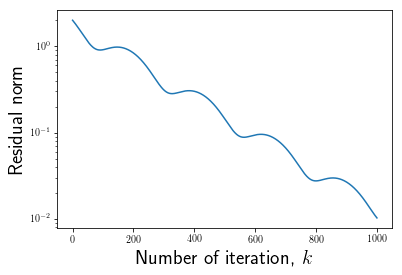

In [7]:
plt.semilogy(conv_r)
plt.xlabel("Number of iteration, $k$", fontsize=20)
plt.ylabel("Residual norm", fontsize=20)

Text(0.5,1,'$x_0 = (0, -1)$')

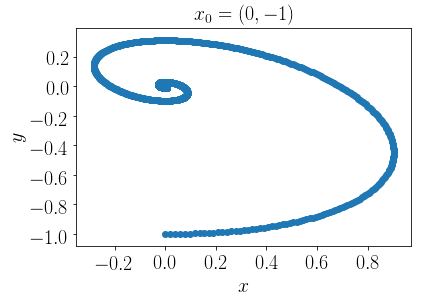

In [8]:
plt.scatter([x[0] for x in conv_x], [x[1] for x in conv_x])
plt.xlabel("$x$", fontsize=20)
plt.ylabel("$y$", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("$x_0 = (0, -1)$", fontsize=20)

## Better iterative methods

But before preconditioners, we can use **better iterative methods**. 

There is a whole **zoo** of iterative methods, but we need to know just few of them.

## Attempt 1: The steepest descent method

- Suppose we **change** $\tau$ every step, i.e. 

$$
   x_{k+1} = x_k - \tau_k (A x_k - f).
$$

- A possible choice of $\tau_k$ is such that it minimizes norm of the current residual

$$ \tau_k = \arg\min_{\tau} \|A(x_k - \tau_k (A x_k - f)) - f\|_2^2.$$

- This problem can be solved analytically (derive this solution!)

$$ \tau_k = \frac{r_k^{\top}r_k}{r_k^{\top}Ar_k}, \quad r_k = Ax_k - f $$

- This method is called **the steepest descent**.

- However, it still converges similarly to the Richardson iteration.

## Attempt 2: Chebyshev iteration

Another way to find $\tau_k$ is to consider

$$e_{k+1} = (I - \tau_k A) e_k = (I - \tau_k A) (I - \tau_{k-1} A)  e_{k-1} = \ldots = p(A) e_0, $$

where $p(A)$ is a **matrix polynomial** (simplest matrix function)  

$$
   p(A) = (I - \tau_k A) \ldots (I - \tau_0 A),
$$

and $p(0) = 1$.

## Optimal choice of time steps
The error is written as 

$$e_{k+1} = p(A) e_0, $$

and hence

$$\|e_{k+1}\| \leq \|p(A)\| \|e_0\|, $$

where $p(0) = 1$ and $p(A)$ is a **matrix polynomial**. 

To get better **error reduction**, we need to minimize

$$\Vert p(A) \Vert$$ 

over all possible polynomials $p(x)$ of degree $k+1$ such that $p(0)=1$. We will use $\|\cdot\|_2$.

##  Polynomials least deviating from zeros

Important special case: $A = A^* > 0$.

Then $A = U \Lambda U^*$, 

and 



$$\Vert p(A) \Vert_2 = \Vert U p(\Lambda) U^* \Vert_2 = \Vert p(\Lambda) \Vert_2 = \max_i |p(\lambda_i)| \overset{!}{\leq}
\max_{\lambda_\min \leq \lambda {\leq} \lambda_\max} |p(\lambda)|.$$

The latter inequality is the only approximation. Here we make a <font color='red'> crucial assumption </font> that we do not want to benefit from distribution of spectra between $\lambda_\min$ and $\lambda_\max$.

Thus, we need to find a polynomial such that $p(0) = 1$, that has the least possible deviation from $0$ on $[\lambda_\min, \lambda_\max]$.

##  Polynomials least deviating from zeros (2)

We can do the affine transformation of the interval $[\lambda_\min, \lambda_\max]$ to the interval $[-1, 1]$:

$$
\xi = \frac{{\lambda_\max + \lambda_\min - (\lambda_\min-\lambda_\max)x}}{2}, \quad x\in [-1, 1].
$$

The problem is then reduced to the problem of finding the **polynomial least deviating from zero** on an interval $[-1, 1]$.

## Exact solution: Chebyshev polynomials

The exact solution to this problem is given by the famous **Chebyshev polynomials** of the form

$$T_n(x) =  \cos (n \arccos x)$$

## What do you need to know about Chebyshev polynomials

1. This is a polynomial! 

2. We can express $T_n$ from $T_{n-1}$ and $T_{n-2}$: 

$$T_n(x) = 2x T_{n-1}(x) - T_{n-2}(x), \quad T_0(x)=1, \quad T_1(x)=x$$

3. $|T_n(x)| \leq 1$ on $x \in [-1, 1]$.

4. It has $(n+1)$ **alternation points**, where the maximal absolute value is achieved (this is the sufficient and necessary condition for the **optimality**) (Chebyshev alternance theorem, no proof here).

5. The **roots** are just 

$$n \arccos x_k = \frac{\pi}{2} + \pi k, \quad \rightarrow\quad x_k = \cos \frac{\pi(2k + 1)}{2n}, \; k = 0, \ldots,n-1$$

We can plot them...

Text(0.5,1,'Interval $x\\in[-1.1, 1.1]$')

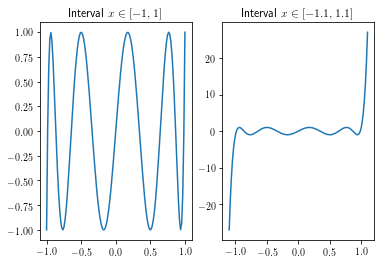

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x1 = np.linspace(-1, 1, 128)
x2 = np.linspace(-1.1, 1.1, 128)
p = np.polynomial.Chebyshev((0, 0, 0, 0, 0, 0, 0, 0, 0, 1), (-1, 1)) #These are Chebyshev series, a proto of "chebfun system" in MATLAB
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x1, p(x1))
ax1.set_title('Interval $x\in[-1, 1]$')
ax2.plot(x2, p(x2))
ax2.set_title('Interval $x\in[-1.1, 1.1]$')

## Convergence of the Chebyshev-accelerated Richardson iteration

Note that $p(x) = (1-\tau_n x)\dots (1-\tau_0 x)$, hence roots of $p(x)$ are $1/\tau_i$ and that we additionally need to map back from $[-1,1]$ to $[\lambda_\min, \lambda_\max]$.
This results into 

$$\tau_i = \frac{2}{\lambda_\max + \lambda_\min - (\lambda_\max - \lambda_\min)x_i}, \quad x_i = \cos \frac{\pi(2i + 1)}{2n}\quad i=0,\dots,n-1$$

The convergence (we only give the result without the proof) is now given by

$$
   e_{k+1} \leq C q^k e_0, \quad q = \frac{\sqrt{\mathrm{cond}(A)}-1}{\sqrt{\mathrm{cond}(A)}+1},
$$

which is better than in the Richardson iteration.

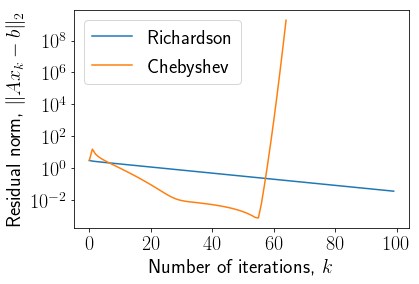

In [7]:
niters = 64
roots = [np.cos((np.pi * (2 * i + 1)) / (2 * niters)) for i in range(niters)]
taus = [(lam_max + lam_min - (lam_min - lam_max) * r) / 2 for r in roots]
x = np.zeros(n)
r = A.dot(x) - rhs
res_cheb = [np.linalg.norm(r)]

# Implementation may be non-optimal if number of iterations is not power of two
def good_shuffle(idx):
    if len(idx) == 1:
        return idx
    else:
        new_len = int(np.ceil((len(idx) / 2)))
        new_idx = good_shuffle(idx[:new_len])
        res_perm = []
        perm_count = 0
        for i in new_idx:
            res_perm.append(i)
            perm_count += 1
            if perm_count == len(idx):
                break
            res_perm.append(len(idx) + 1 - i)
            perm_count += 1
            if perm_count == len(idx):
                break
        return res_perm

# good_perm = good_shuffle([i for i in range(1, niters+1)])
# good_perm = [i for i in range(niters, 0, -1)]
good_perm = [i for i in range(niters)]
# good_perm = np.random.permutation([i for i in range(1, niters+1)])

for i in range(niters):
    x = x - 1.0/taus[good_perm[i] - 1] * r
    r = A.dot(x) - rhs
    res_cheb.append(np.linalg.norm(r))
    
plt.semilogy(res_richardson, label="Richardson")
plt.semilogy(res_cheb, label="Chebyshev")
plt.legend(fontsize=20)
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("Residual norm, $\|Ax_k - b\|_2$", fontsize=20)
plt.xticks(fontsize=20)
_ = plt.yticks(fontsize=20)

### What happened with great Chebyshev iterations?

- Permutation of roots of Chebyshev polynomial has crucial effect on convergence
- On the optimal permutation you can read in paper (V. Lebedev, S. Finogenov 1971)  ([ru](http://www.mathnet.ru/links/42ab1a270ad179d43359ef8fab53422c/zvmmf6870.pdf), [en](https://www.sciencedirect.com/science/article/abs/pii/0041555371901698?via%3Dihub))

### [Chebfun](http://www.chebfun.org/) project

- Opensource project for numerical computing ([Python](https://github.com/chebpy/chebpy) and [Matlab](https://github.com/chebfun/chebfun) interfaces)
- It is based on numerical algorithms working with piecewise polynomial interpolants and Chebyshev polynomials
- This project was initiated by Nick Trefethen and his student Zachary Battles in 2002, see [paper on chebfun project in SISC](http://www.chebfun.org/publications/chebfun_paper.pdf)
- Chebfun toolbox focuses mostly on the following problems
    - Approximation
    - Quadrature
    - ODE
    - PDE
    - Rootfinding
    - 1D global optimization

## Beyond Chebyshev

- We have made an important assumption about the spectrum: it is contained within an interval over the real line (and we need to know the bounds)

- If the spectrum is contained within **two intervals**, and we know the bounds, we can also put the optimization problem for the **optimal polynomial**.

## Spectrum of the matrix contained in multiple segments

- For the case of **two segments** the best polynomial is given by **[Zolotarev polynomials](https://www.encyclopediaofmath.org/index.php/Zolotarev_polynomials)** (expressed in terms of elliptic functions). Original paper was published in 1877, see details [here](http://gpntb.dlibrary.org/ru/nodes/4245-zolotarev-e-prilozhenie-ellipticheskih-funktsiy-k-voprosam-o-funktsiyah-naimenee-i-naibolee-otklonyayuschihsya-ot-nulya-spb-1877) 

- For the case of **more than two segments** the best polynomial can be expressed in terms of **hyperelliptic functions**

## How can we make it better

- The implementation of the Chebyshev acceleration requires the knowledge of the spectrum.

- It only stores the **previous vector** $x_k$ and computes the new correction vector

$$r_k = A x_k - f.$$

- It belongs to the class of **two-term** iterative methods, i.e. it approximates $x_{k+1}$ using 2 vectors: $x_k$ and $r_k$.

- It appears that if we **store more vectors**, then we can go without the spectrum estimation (and better convergence in practice)!

## Crucial point: Krylov subspace

The Chebyshev method produces the approximation of the form

$$x_{k+1} = x_0 + p(A) r_0,$$

i.e. it lies in the **Krylov subspace** of the matrix  which is defined as

$$
   \mathcal{K}_k(A, r_0) = \mathrm{Span}(r_0, Ar_0, A^2 r_0, \ldots, A^{k-1}r_0 )
$$

The most natural approach then is to find the vector in this **linear subspace** that minimizes 
certain **norm of the error**

## Idea of Krylov methods

The idea is to minimize given functional:
- Energy norm of error for systems with hermitian positive-definite matrices (CG method).
- Residual norm for systems with general matrices (MINRES and GMRES methods).
- Rayleigh quotient for eigenvalue problems (Lanczos method).

To make methods practical one has to 
1. Orthogonalize vectors $A^i r_0$ of the Krylov subspace for stability (Lanczos process).
2. Derive recurrent formulas to decrease complexity.

We will consider these methods in details on the next lecture.

## Take home message

- Main idea of iterative methods
- Richardson iteration: hermitian and non-hermitian case
- Chebyshev acceleration
- Definition of Krylov subspace

### Questions?

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()